In [ ]:
!pip install azureml-core
!pip install azure-cognitiveservices-vision-computervision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import requests
import time

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

In [ ]:
subscription_key = '你的API Key'
endpoint = '你的API 網址'

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

## Tagging

In [ ]:
def CVapi(img, client):
    tags_result_remote = client.tag_image(img)
    print("Tags in the remote image: ")
    if (len(tags_result_remote.tags) == 0):
        print("No tags detected.")
    else:
        for tag in tags_result_remote.tags:
            print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))
    print()
    print("End of Computer Vision quickstart.")
    return tags_result_remote

Tags in the remote image: 
'outdoor' with confidence 99.00%
'building' with confidence 98.81%
'sky' with confidence 98.21%
'stadium' with confidence 98.17%
'ancient rome' with confidence 96.16%
'ruins' with confidence 95.04%
'amphitheatre' with confidence 93.99%
'ancient roman architecture' with confidence 92.65%
'historic site' with confidence 89.55%
'ancient history' with confidence 89.54%
'history' with confidence 86.72%
'archaeological site' with confidence 84.41%
'travel' with confidence 65.85%
'large' with confidence 61.02%
'city' with confidence 56.57%

End of Computer Vision quickstart.


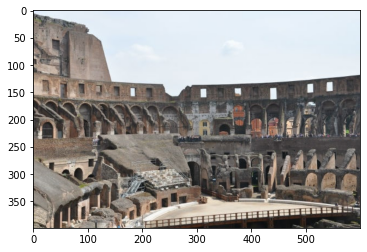

In [ ]:
IMGURL='https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg'
img = plt.imread(requests.get(IMGURL, stream=True).raw, format='jpg')
fig, ax = plt.subplots()
ax.imshow(img)
read_result=CVapi(IMGURL, computervision_client)
plt.show()

## OCR

In [ ]:
def OCRapi(img_url, client):
    read_response = client.read(img_url,  raw=True)
    read_operation_location = read_response.headers["Operation-Location"]
    operation_id = read_operation_location.split("/")[-1]

    while True:
        read_result = client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    return read_result

In [ ]:
def convert_points_to_lines(points):
    x = points[::2]
    y = points[1::2]
    x.append(x[0])
    y.append(y[0])
    return x,y

The quick brown fox jumps
over the lazy dog!


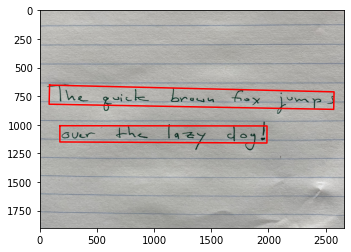

In [ ]:
IMGURL="https://raw.githubusercontent.com/MicrosoftDocs/azure-docs/master/articles/cognitive-services/Computer-vision/Images/readsample.jpg"
img = plt.imread(requests.get(IMGURL, stream=True).raw, format='jpg')
fig, ax = plt.subplots()
ax.imshow(img)

read_result=OCRapi(IMGURL, computervision_client)

for text_result in read_result.analyze_result.read_results:
    for line in text_result.lines:
        print(line.text)
        x,y = convert_points_to_lines(line.bounding_box)
        plt.plot(x,y,c='r')

plt.show()